<a href="https://colab.research.google.com/github/nefetorve/big_data/blob/master/02_pandas/05_appstore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [4]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url) # surowe dane

In [5]:
df_raw.head() 

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [7]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [8]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [13]:
df = df.drop(columns = ["In-app Purchases"])

In [14]:
df.columns

Index(['ID', 'Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [15]:
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [16]:
df = df.set_index('ID')

In [17]:
df

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.5,4.5,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,46.0,309.0,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,56768954.0,133027072.0,4.005591e+09


In [21]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,17007,16847,TV Chess,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [22]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [23]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [24]:
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [29]:
list(df.primary_genre.value_counts().nlargest(5).index)

['Games', 'Education', 'Entertainment', 'Utilities', 'Sports']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


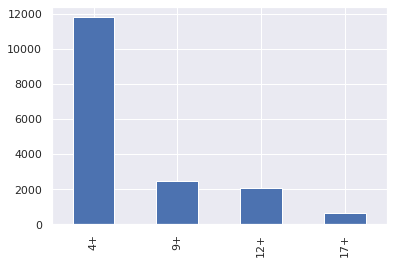

In [34]:
import seaborn as sns
sns.set()
df.age_rating.value_counts().plot(kind='bar')

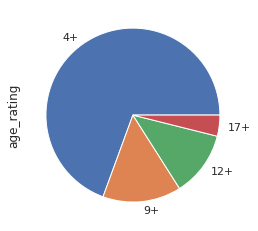

In [36]:
_ = df.age_rating.value_counts().plot(kind='pie')

In [38]:
df.price.value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: price, dtype: int64

In [41]:
df.average_user_rating.value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average_user_rating, dtype: int64

In [67]:
avaible_languages = [] 
for languages in df.languages.value_counts().index.unique():
  for dirt_language in languages.split(','):
    language = dirt_language.strip()
    if language not in avaible_languages:
      avaible_languages.append(language)



In [79]:
current_languages = 'EN'
values = 0 
type(df.languages.value_counts())

pandas.core.series.Series

In [82]:
values = {}
for current_languages in avaible_languages:
  values[current_languages] = 0 
  for index, value in df.languages.value_counts().items():
    if current_languages in index:
      values[current_languages] += value



In [86]:
sort_values = sorted(values.items(), key=lambda x:x[1])

In [87]:
sort_values

[('MI', 1),
 ('XH', 1),
 ('AY', 1),
 ('BR', 1),
 ('DZ', 1),
 ('FO', 1),
 ('GD', 1),
 ('GN', 1),
 ('IU', 1),
 ('JV', 1),
 ('RW', 1),
 ('RN', 1),
 ('MG', 1),
 ('GV', 1),
 ('QU', 1),
 ('SU', 1),
 ('TT', 1),
 ('TI', 1),
 ('TO', 1),
 ('UG', 1),
 ('KR', 2),
 ('TG', 2),
 ('TK', 2),
 ('KY', 2),
 ('KU', 2),
 ('MT', 2),
 ('YI', 2),
 ('KL', 2),
 ('AS', 3),
 ('KS', 3),
 ('OR', 3),
 ('OM', 3),
 ('SA', 3),
 ('SD', 3),
 ('SO', 3),
 ('BO', 3),
 ('PS', 3),
 ('EO', 3),
 ('LA', 4),
 ('KK', 4),
 ('UZ', 4),
 ('CY', 4),
 ('AM', 5),
 ('ZU', 5),
 ('KM', 6),
 ('LO', 6),
 ('BS', 6),
 ('EU', 7),
 ('MY', 7),
 ('GL', 7),
 ('MN', 7),
 ('SI', 7),
 ('SW', 7),
 ('GA', 7),
 ('AZ', 8),
 ('KA', 8),
 ('IS', 8),
 ('NE', 8),
 ('BE', 9),
 ('SE', 11),
 ('SQ', 11),
 ('ET', 12),
 ('MK', 12),
 ('AF', 13),
 ('NN', 13),
 ('TL', 18),
 ('UR', 19),
 ('LT', 23),
 ('PA', 31),
 ('SR', 33),
 ('ML', 35),
 ('HY', 36),
 ('TE', 36),
 ('LV', 38),
 ('GU', 42),
 ('MR', 46),
 ('KN', 47),
 ('SL', 49),
 ('TA', 49),
 ('NO', 49),
 ('BN', 50),
 ('BG'